<a href="https://colab.research.google.com/github/sarahyoo0204/Hanwha-Python-Project/blob/main/Photorespiration_Subcellular_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Subcellular localization using SUBA4

In [ ]:
import pandas as pd
path_dfe = '/content/OSD217_WS_FLT_vs_GC_differential_expression(1).csv'
dfe = pd.read_csv(path_dfe)

In [ ]:
filtered_dfe = dfe[dfe.duplicated(subset='TAIR', keep=False)]
#dfe.drop_duplicates(subset='TAIR', keep="first”)

In [ ]:
# Filter for log2FoldChange values > 1.2 or lower than -1.2
filtered_dfe = filtered_dfe[(filtered_dfe['log2FoldChange'] > 1.2) | (filtered_dfe['log2FoldChange'] < -1.2)]

# Filter for pvalue values lower than 0.05
filtered_dfe = filtered_dfe[filtered_dfe['pvalue'] < 0.05]

NameError: name 'filtered_dfe' is not defined

In [ ]:
filtered_dfe.head()

,Unnamed: 0,TAIR,log2FoldChange,pvalue
0,1,AT1G01010,-1.677377,0.003722
1,2,AT1G01010,-1.677377,0.003722
2,3,AT1G01010,-1.677377,0.003722
15,16,AT1G01060,2.929497,0.005874
16,17,AT1G01060,2.929497,0.005874


In [ ]:
filtered_dfe

,Unnamed: 0,TAIR,log2FoldChange,pvalue
0,1,AT1G01010,-1.677377,0.003722
1,2,AT1G01010,-1.677377,0.003722
2,3,AT1G01010,-1.677377,0.003722
15,16,AT1G01060,2.929497,0.005874
16,17,AT1G01060,2.929497,0.005874
...,...,...,...,...
36122,36123,ATCG00670,2.459940,0.005970
36155,36156,ATCG01130,2.361439,0.000866
36156,36157,ATCG01130,2.361439,0.000866
36203,36204,ATMG00480,1.681874,0.008685


In [ ]:
path = '/content/OSD217_WS_FLT_vs_GC.tsv'
df = pd.read_csv(path,sep='\t', header=None, names=['TAIR','color'])

In [ ]:
txt_file_path = '/content/pathway-genes-PWY-181.txt'
txt_df = pd.read_csv(txt_file_path, sep='\t', skiprows=2)
print(txt_df.shape)
AraCyc_gene_list = txt_df

(35, 7)


In [ ]:
df.head()

,TAIR,color
0,AT1G19250,#FF0000
1,AT3G07650,#FF2525
2,AT4G22517,#FF0000
3,AT3G24140,#FF0000
4,AT4G10265,#FF0000


In [ ]:
df

,TAIR,color
0,AT1G19250,#FF0000
1,AT3G07650,#FF2525
2,AT4G22517,#FF0000
3,AT3G24140,#FF0000
4,AT4G10265,#FF0000
...,...,...
7993,AT2G36180,#0000FF
7994,AT4G06195,#FF1B1B
7995,AT5G47350,#0000FF
7996,AT4G08780,#3636FF


In [ ]:
OSD217_gl = list(df['TAIR'])
AC_gl = AraCyc_gene_list['Gene ID']

In [ ]:
#Some of the Entries come as ATG403 and some as ATG403.1, to avoid not counting
#these, we are using the following to consider the above as equal
import re

def normalize_entry(entry):
    """
    Normalize an entry by removing version suffixes.
    """
    # Use regular expression to remove any decimal followed by digits at the end
    return re.sub(r'\.\d+$', '', entry)

# Normalize entries in each dataset
norm_AraCyc = [normalize_entry(entry) for entry in AC_gl]
norm_OSD217 = [normalize_entry(entry) for entry in OSD217_gl]

print("Normalized AraCyc Genes:", norm_AraCyc)
print("Normalized OSD217 Genes:", norm_OSD217)

Normalized AraCyc Genes: ['AT5G38420', 'AT1G67090', 'ATCG00490', 'AT5G38430', 'ATCG00490', 'AT1G67090', 'ATCG00490', 'AT5G38410', 'ATCG00490', 'AT5G38420', 'AT5G36790', 'AT5G47760', 'AT5G36700', 'AGT1', 'AT1G68010', 'AT2G45630', 'AT1G12550', 'AT1G79870', 'AT1G72190', 'AT5G28310', 'AT3G25530', 'AT1G11990', 'AT1G80380', 'AT2G35370', 'AT2G35120', 'AGT1', 'AT1G23310', 'AT1G70580', 'AT5G26780', 'AT4G13890', 'AT1G36370', 'AT4G32520', 'AT1G22020', 'AT4G13930', 'AT4G37930']
Normalized OSD217 Genes: ['AT1G19250', 'AT3G07650', 'AT4G22517', 'AT3G24140', 'AT4G10265', 'AT1G02450', 'AT2G36790', 'AT1G58983', 'AT5G58150', 'AT1G23410', 'AT4G22513', 'AT4G02720', 'AT3G46670', 'AT2G02950', 'AT4G25110', 'AT3G52970', 'AT3G11690', 'AT2G40750', 'AT1G10340', 'AT4G26288', 'AT2G20670', 'AT3G23530', 'AT4G16563', 'AT2G39210', 'AT4G10270', 'AT2G23340', 'AT1G56120', 'AT5G56550', 'AT1G51620', 'AT5G61440', 'AT3G15450', 'AT5G16570', 'AT3G50770', 'AT1G74440', 'AT3G25882', 'AT2G26040', 'AT1G25400', 'AT5G24030', 'AT3G1004

In [ ]:
#In case we have an entry like: ATCG00710|ATCG00720, we want to make a check
#to split the entry by | to consider both genes

def separate_entries(entry):
    """
    Separate an entry containing multiple IDs separated by "|".
    """
    return entry.split("|")

# Initialize lists to store separated genes
sep_AraCyc = []
sep_OSD217 = []

# Separate genes in AraCyc dataset
for entry in norm_AraCyc:
    sep_AraCyc.extend(separate_entries(entry))

# Separate genes in Ruth dataset
for entry in norm_OSD217:
    sep_OSD217.extend(separate_entries(entry))

print("Separated AraCyc Genes", sep_AraCyc)
print("Separated Ruth Genes:", sep_OSD217)

Separated AraCyc Genes ['AT5G38420', 'AT1G67090', 'ATCG00490', 'AT5G38430', 'ATCG00490', 'AT1G67090', 'ATCG00490', 'AT5G38410', 'ATCG00490', 'AT5G38420', 'AT5G36790', 'AT5G47760', 'AT5G36700', 'AGT1', 'AT1G68010', 'AT2G45630', 'AT1G12550', 'AT1G79870', 'AT1G72190', 'AT5G28310', 'AT3G25530', 'AT1G11990', 'AT1G80380', 'AT2G35370', 'AT2G35120', 'AGT1', 'AT1G23310', 'AT1G70580', 'AT5G26780', 'AT4G13890', 'AT1G36370', 'AT4G32520', 'AT1G22020', 'AT4G13930', 'AT4G37930']
Separated Ruth Genes: ['AT1G19250', 'AT3G07650', 'AT4G22517', 'AT3G24140', 'AT4G10265', 'AT1G02450', 'AT2G36790', 'AT1G58983', 'AT5G58150', 'AT1G23410', 'AT4G22513', 'AT4G02720', 'AT3G46670', 'AT2G02950', 'AT4G25110', 'AT3G52970', 'AT3G11690', 'AT2G40750', 'AT1G10340', 'AT4G26288', 'AT2G20670', 'AT3G23530', 'AT4G16563', 'AT2G39210', 'AT4G10270', 'AT2G23340', 'AT1G56120', 'AT5G56550', 'AT1G51620', 'AT5G61440', 'AT3G15450', 'AT5G16570', 'AT3G50770', 'AT1G74440', 'AT3G25882', 'AT2G26040', 'AT1G25400', 'AT5G24030', 'AT3G10040', '

In [ ]:
#After the ID's are normalized in the name format and entry structure, we can
#now compare
shared_entries = set(sep_AraCyc) & set(sep_OSD217)

AraCyc_only_entries = set(sep_AraCyc) - shared_entries
OSD217_only_entries = set(sep_OSD217) - shared_entries

#AraCyc_only_df = txt_df[sep_AraCyc.isin(txt_only_entries)]
#Ruth_only_df = csv_df[sep_Ruth.isin(csv_only_entries)]

In [ ]:
len(shared_entries)

17

In [ ]:
len(AraCyc_only_entries)

12

In [ ]:
len(OSD217_only_entries)

7981

FETCHING DIFFERENTIAL EXPRESSION DATA

In [ ]:
filtered_dfe.shape

(5986, 4)

In [ ]:
#Some of the Entries come as ATG403 and some as ATG403.1, to avoid not counting
#these, we are using the following to consider the above as equal

# Normalize entries in each dataset
filtered_dfe['TAIR_norm'] = [normalize_entry(entry) for entry in filtered_dfe['TAIR']]

In [ ]:
filtered_dfe.shape

(5986, 5)

In [ ]:
# Separate genes in AraCyc dataset
for entry in filtered_dfe['TAIR']:
    filtered_dfe['TAIR'] = filtered_dfe['TAIR'].str.split('|').explode()

In [ ]:
filtered_dfe.shape

(5986, 5)

In [ ]:
shared_df = filtered_dfe[filtered_dfe['TAIR'].isin(shared_entries)]

In [ ]:
shared_df.shape

(15, 5)

In [ ]:
set(shared_df['TAIR'])

{'AT1G23310', 'AT1G68010', 'AT4G13890', 'AT4G37930', 'AT5G36700', 'AT5G38420'}

In [ ]:
shared_df

,Unnamed: 0,TAIR,log2FoldChange,pvalue,TAIR_norm
3712,3713,AT1G23310,5.625899,2.134326e-05,AT1G23310
3713,3714,AT1G23310,5.625899,2.134326e-05,AT1G23310
3714,3715,AT1G23310,5.625899,2.134326e-05,AT1G23310
7726,7727,AT1G68010,6.346837,3.047396e-05,AT1G68010
7727,7728,AT1G68010,6.346837,3.047396e-05,AT1G68010
23885,23886,AT4G13890,-4.770408,3.103933e-02,AT4G13890
23886,23887,AT4G13890,-4.770408,3.103933e-02,AT4G13890
23887,23888,AT4G13890,-4.770408,3.103933e-02,AT4G13890
27482,27483,AT4G37930,4.959410,1.311516e-04,AT4G37930
27483,27484,AT4G37930,4.959410,1.311516e-04,AT4G37930


In [ ]:
shared_df = shared_df.sort_values(by='log2FoldChange')

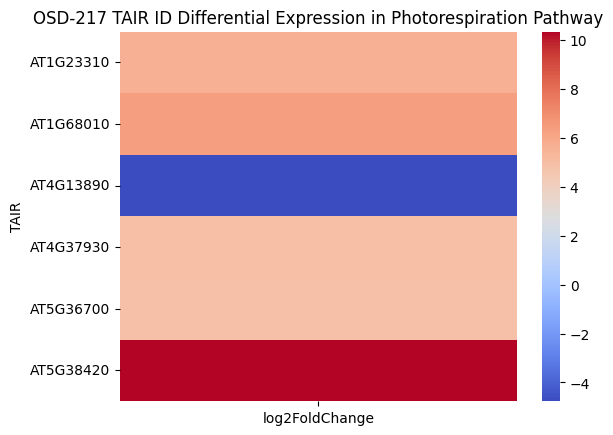

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = shared_df
# Assuming your data is in a pandas DataFrame called 'data'
sns.heatmap(data.pivot_table(index='TAIR', values='log2FoldChange'), cmap='coolwarm')  # Adjust cmap for color scheme
plt.title('OSD-217 TAIR ID Differential Expression in Photorespiration Pathway')  # Add title using plt.title
plt.show()

In [ ]:
merged_df = pd.merge(shared_df, AraCyc_gene_list, left_on='TAIR', right_on='Gene ID', how='left')
#We use this because the OSD217 file has no information about the Enzymatic Activity, so we just make a big df

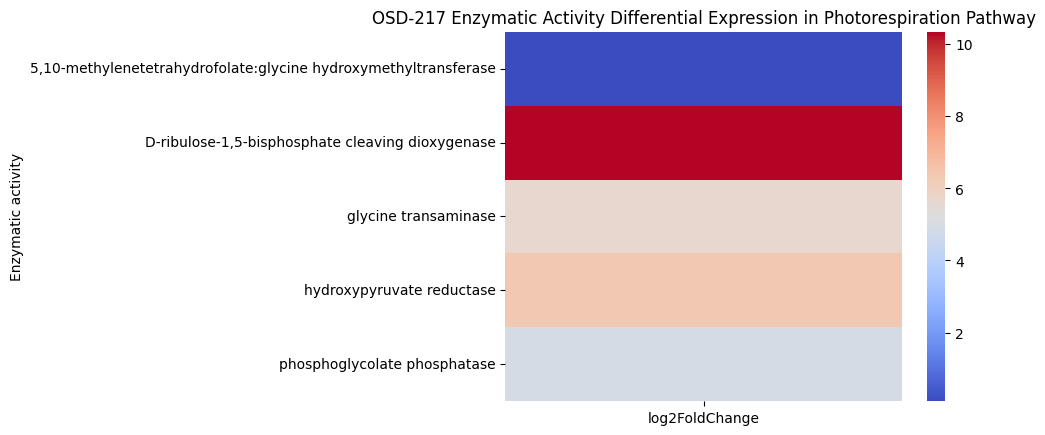

In [ ]:
data = merged_df
# Assuming your data is in a pandas DataFrame called 'data'
sns.heatmap(data.pivot_table(index='Enzymatic activity', values='log2FoldChange'), cmap='coolwarm')  # Adjust cmap for color scheme
plt.title('OSD-217 Enzymatic Activity Differential Expression in Photorespiration Pathway')  # Add title using plt.title
plt.show()

In [ ]:
#We can add localization right after this and group by organelle and plot heatmaps aswell

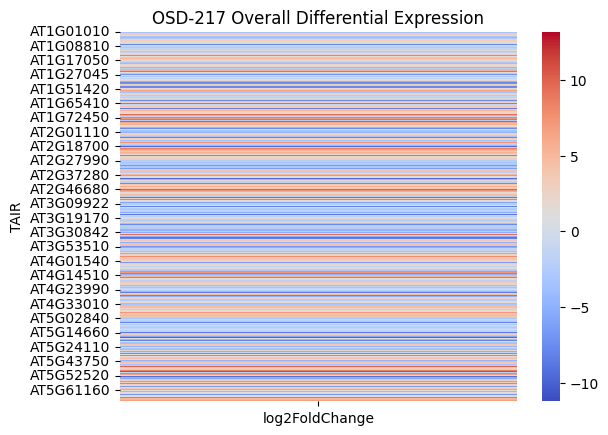

In [ ]:
#Overall Heatmap for OSD217:
data = filtered_dfe
# Assuming your data is in a pandas DataFrame called 'data'
sns.heatmap(data.pivot_table(index='TAIR', values='log2FoldChange'), cmap='coolwarm')  # Adjust cmap for color scheme
plt.title('OSD-217 Overall Differential Expression')  # Add title using plt.title
plt.show()


In [ ]:
import seaborn as sns

# Create FacetGrid based on 'group'
g = sns.FacetGrid(data, col='group')

# Define the heatmap function inside FacetGrid
def heatmap_func(x):
  sns.heatmap(x.pivot_table(index='TAIR', values='log2FoldChange'), cmap='coolwarm')  # Adjust cmap for color scheme

g.map(heatmap_func)  # Apply the heatmap function to each facet
g.fig.suptitle('Heatmaps by Group')  # Set overall title
plt.show()

In [ ]:
my_data = list(filtered_dfe['TAIR'])
with open('OSD217_genes.txt', 'w') as f:
    f.write(str(list(filtered_dfe['TAIR'])))

print("Data exported successfully!")

Data exported successfully!


In [ ]:
filtered_dfe.shape

(5986, 5)

In [ ]:
#I am currently waiting on the job for SUBA4 that I submited, I exported the txt so I could copy paste into the browser :)


# Merging all the genes needed for subcellular localization

DATASETS WITHOUT FILTERING

In [ ]:
import pandas as pd
path ='/content/GLDS-427_rna_seq_differential_expression_combined(2).csv'
OSD427 = pd.read_csv(path, sep=',')
OSD_427_WT = OSD427.dropna(subset=['Log2fc.WT', 'P.value.WT'])
OSD_427_elp = OSD427.dropna(subset=['Log2fc.elp', 'P.value.elp'])
OSD_427_met = OSD427.dropna(subset=['Log2fc.met', 'P.value.met'])

path ='/content/OSD217_WS_FLT_vs_GC_differential_expression(2).csv'
OSD_217 = pd.read_csv(path, sep=',')

paths = ['/content/Table 4_DataMine.XLSX.xlsx - WT-LD-sp.vs.WT-LD-gr.csv', '/content/Table 5_DataMine.XLSX.xlsx - FG-LD-sp.vs.FG-LD-gr.csv', '/content/Table 6_DataMine.XLSX.xlsx - WT-SD-sp.vs.WT-SD-gr.csv', '/content/Table 7_DataMine.XLSX.xlsx - FG-SD-sp.vs.FG-SD-gr(2).csv']

dfs = [pd.read_csv(path, sep=',') for path in paths]

# Assigning each DataFrame to separate variables
OSD_469_WT_LD, OSD_469_FG_LD, OSD_469_WT_SD, OSD_469_FG_SD = dfs

#Saving the variables so I can use them later in comparisons b/w filtered and unfiltered
OSD_469_WT_LD_uf, OSD_469_FG_LD_uf, OSD_469_WT_SD_uf, OSD_469_FG_SD_uf = dfs
OSD_427_WT_uf = OSD_427_WT
OSD_427_elp_uf = OSD_427_elp
OSD_427_met_uf = OSD_427_met
OSD_217_uf = OSD_217

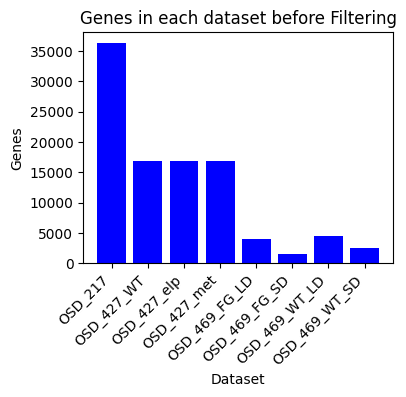

In [ ]:
#Size of genes per dataset

import matplotlib.pyplot as plt
dataset_lengths = [len(OSD_217), len(OSD_427_WT),len(OSD_427_elp), len(OSD_427_met), len(OSD_469_FG_LD), len(OSD_469_FG_SD), len(OSD_469_WT_LD), len(OSD_469_WT_SD)]

dataset_names = ['OSD_217', 'OSD_427_WT', 'OSD_427_elp', 'OSD_427_met',
                 'OSD_469_FG_LD', 'OSD_469_FG_SD', 'OSD_469_WT_LD', 'OSD_469_WT_SD']

plt.figure(figsize=(4, 3))
plt.bar(dataset_names, dataset_lengths, color='blue')
plt.xlabel('Dataset')
plt.ylabel('Genes')
plt.title('Genes in each dataset before Filtering')
plt.xticks(rotation=45, ha='right')

plt.show()

DATASETS AFTER FILTERING

In [ ]:
globals().clear()

In [ ]:
locals().clear()

In [ ]:
#Import the tsv files

In [ ]:
import pandas as pd
paths = ['/content/OSD217_WS_FLT_vs_GC(1).tsv', '/content/OSD427_WT_filtered.tsv','/content/OSD427_elp_filtered.tsv','/content/OSD427_met_filtered.tsv','/content/OSD469_FG_LD_FLT_vs_GC_filtered.tsv','/content/OSD469_FG_SD_FLT_vs_GC_filtered.tsv','/content/OSD469_WT_LD_FLT_vs_GC_filtered.tsv','/content/OSD469_WT_SD_FLT_vs_GC_filtered.tsv']

dfs_2 = [pd.read_csv(path, sep='\t', header=None, names=['TAIR', 'color']) for path in paths]

# Assigning each DataFrame to separate variables
OSD_217, OSD_427_WT, OSD_427_elp, OSD_427_met, OSD_469_FG_LD, OSD_469_FG_SD, OSD_469_WT_LD, OSD_469_WT_SD = dfs_2

#Saving the filtering for later comparison:
OSD_217_f, OSD_427_WT_f, OSD_427_elp_f, OSD_427_met_f, OSD_469_FG_LD_f, OSD_469_FG_SD_f, OSD_469_WT_LD_f, OSD_469_WT_SD_f = dfs_2


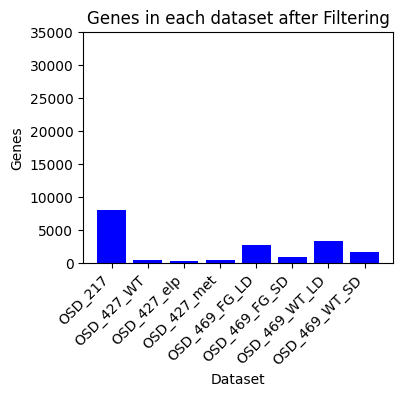

In [ ]:
#Size of genes per dataset

import matplotlib.pyplot as plt
dataset_lengths_f = [len(OSD_217), len(OSD_427_WT),len(OSD_427_elp), len(OSD_427_met), len(OSD_469_FG_LD), len(OSD_469_FG_SD), len(OSD_469_WT_LD), len(OSD_469_WT_SD)]

dataset_names = ['OSD_217', 'OSD_427_WT', 'OSD_427_elp', 'OSD_427_met',
                 'OSD_469_FG_LD', 'OSD_469_FG_SD', 'OSD_469_WT_LD', 'OSD_469_WT_SD']

plt.figure(figsize=(4, 3))
plt.bar(dataset_names, dataset_lengths_f, color='blue')
plt.xlabel('Dataset')
plt.ylabel('Genes')
plt.title('Genes in each dataset after Filtering')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 35000)

plt.show()

KeyError: '_oh'

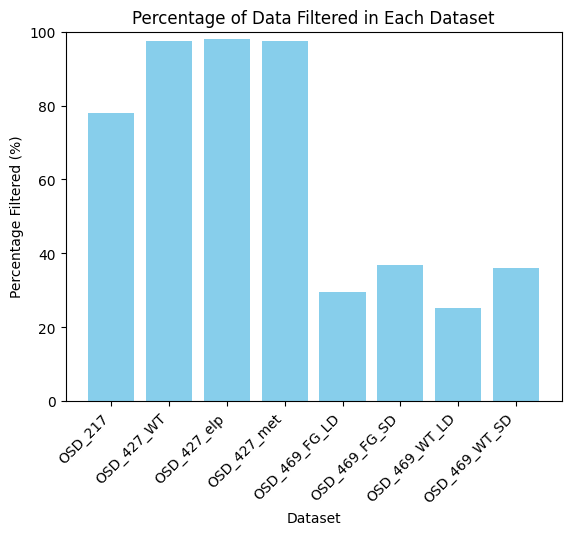

In [ ]:
import matplotlib.pyplot as plt

original_dataset_lengths = dataset_lengths
dataset_lengths = dataset_lengths_f
percentages_filtered = [(original - filtered) / original * 100 for original, filtered in zip(original_dataset_lengths, dataset_lengths)]


# Create a bar chart
#plt.figure(figsize=(8, 6))
plt.bar(dataset_names, percentages_filtered, color='skyblue')
plt.xlabel('Dataset')
plt.ylabel('Percentage Filtered (%)')
plt.title('Percentage of Data Filtered in Each Dataset')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for percentages

In [ ]:
print(original_dataset_lengths)
print(dataset_lengths_f)

[36280, 16850, 16850, 16850, 3922, 1472, 4433, 2572]
[7998, 433, 337, 443, 2768, 929, 3316, 1644]


In [ ]:
#Merge all the TAIR columns for all tsv files

([0, 1],
 [Text(0, 0, 'all_genes_expressed'), Text(1, 0, 'unique_genes_expressed')])

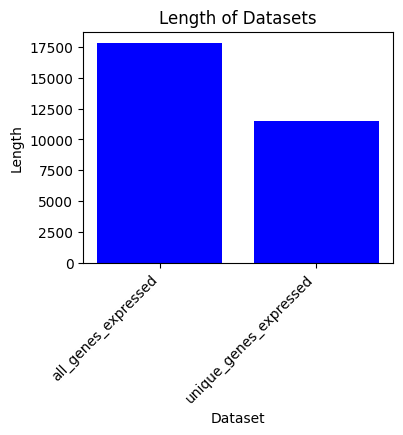

In [ ]:
combined_df = pd.concat([OSD_217, OSD_427_WT, OSD_427_elp, OSD_427_met, OSD_469_FG_LD, OSD_469_FG_SD, OSD_469_WT_LD, OSD_469_WT_SD])
set_combined_df = set(combined_df['TAIR'])
num_rep_genes = [len(combined_df), len(set_combined_df)]
num_rep_genes_names = ['all_genes_expressed','unique_genes_expressed']

plt.figure(figsize=(4, 3))
plt.bar(num_rep_genes_names, num_rep_genes, color='blue')
plt.xlabel('Dataset')
plt.ylabel('Length')
plt.title('Length of Datasets')
plt.xticks(rotation=45, ha='right')

In [ ]:
num_rep_genes

[17868, 11468]

In [ ]:
split_per_person = round(num_rep_genes[1]/8)
print(split_per_person)

1434


In [ ]:
set_combined_df = pd.DataFrame(set_combined_df, columns=['TAIR']).sort_index()
df = pd.DataFrame({'TAIR': set_combined_df['TAIR']}, index=set_combined_df.index)
# Assign 'Assignment' values based on index ranges
df['Assignment'] = 0  # Initialize 'Assignment' column with zeros
df.iloc[0:1434, 1] = 1  # Assign 1 to rows from index 0 to 22
df.iloc[1434:2868, 1] = 2
df.iloc[2868:4302, 1] = 3
df.iloc[4302:5736,1] = 4
df.iloc[5736:7170,1] = 5
df.iloc[7170:8604,1] = 6
df.iloc[8604:10038,1] = 7
df.iloc[10038:11467,1] = 8

In [ ]:
df.shape

(11468, 2)

In [ ]:
df.head()

,TAIR,Assignment
0,AT2G35790,1
1,AT1G64400,1
2,AT4G25410,1
3,AT2G31540,1
4,AT1G51090,1


In [ ]:
df.to_csv('unique_genes_OSD217_OSD427_OSD469_split_in_8.csv', index=False)

# All code to plot subcellular Location individually


In [ ]:
import pandas as pd
gfp_path = '/content/24_10_2016_gfp.csv'
gfp_SUBA_2016 = pd.read_csv(gfp_path, sep=',')

In [ ]:
path = '/content/OSD469_FG_SD_FLT_vs_GC_filtered.csv'
OSD469_FG_SD = pd.read_csv(path, header=None, sep=',', skiprows = 1)
OSD469_FG_SD.columns = ["ID", "TAIR", "log2FoldChange","pvalue"]
#print(OSD469_FG_SD.head())


In [ ]:
print(OSD469_FG_SD.head())
#This is a weird way to put it, but the cache is a problem, not sure why this works

          ID       TAIR  log2FoldChange  pvalue
0  247684_at  AT5G59670           5.980  0.0428
1  254066_at  AT4G25480           4.968  0.0254
2  250914_at  AT5G03780           4.713  0.0217
3  262454_at  AT1G11190           3.878  0.0110
4  266376_at  AT2G14620           3.820  0.0099


In [ ]:
OSD469_FG_SD = pd.DataFrame(OSD469_FG_SD, columns=["ID", "TAIR", "log2FoldChange","pvalue"])

In [ ]:
print(OSD469_FG_SD.head())

   ID       TAIR  log2FoldChange  pvalue
0 NaN  AT5G59670           5.980  0.0428
1 NaN  AT4G25480           4.968  0.0254
2 NaN  AT5G03780           4.713  0.0217
3 NaN  AT1G11190           3.878  0.0110
4 NaN  AT2G14620           3.820  0.0099


In [ ]:
print(gfp_SUBA_2016.head())
#Doesn't work rn, but I just have to trust rn lmaoooooo


   id        locus          Location_LVL1   location_LVL2 location_LVL3  \
0   1  AT1G01020.1  endoplasmic reticulum             NaN           NaN   
1   2  AT1G01040.1                nucleus             NaN           NaN   
2   3  AT1G01040.1                nucleus             NaN           NaN   
3   4  AT1G01040.1                nucleus  nuclear matrix           NaN   
4   5  AT1G01050.1                unclear             NaN           NaN   

       PMID  
0  16725371  
1  12857820  
2  15821876  
3  23424246  
4  15610358  


In [ ]:
gfp_SUBA_2016.shape

(4820, 7)

In [ ]:
# Extract the part before the dot in the 'locus' column
gfp_SUBA_2016['locus_trimmed'] = gfp_SUBA_2016['locus'].str.split('.').str[0]

In [ ]:
# Merge the DataFrames based on matching values in the 'locus_trimmed' and 'TAIR' columns
apple = pd.merge(gfp_SUBA_2016, OSD469_FG_SD, left_on='locus_trimmed', right_on='TAIR', how='inner')

In [ ]:
apple.head()

,id,locus,Location_LVL1,location_LVL2,location_LVL3,PMID,locus_trimmed,Unnamed: 0,TAIR,log2FoldChange,pvalue
0,43,AT1G02870.1,nucleus,NaN,NaN,21908688,AT1G02870,262112_at,AT1G02870,1.310,0.0049
1,106,AT1G05560.1,cytosol,cell plate,NaN,11283335,AT1G05560,263184_at,AT1G05560,-2.365,0.0071
2,108,AT1G05575.1,endoplasmic reticulum,NaN,NaN,12837943,AT1G05575,263182_at,AT1G05575,-1.496,0.0214
3,109,AT1G05575.1,endoplasmic reticulum,NaN,NaN,21443605,AT1G05575,263182_at,AT1G05575,-1.496,0.0214
4,157,AT1G08130.1,mitochondrion,NaN,NaN,15270689,AT1G08130,261810_at,AT1G08130,1.456,0.0104


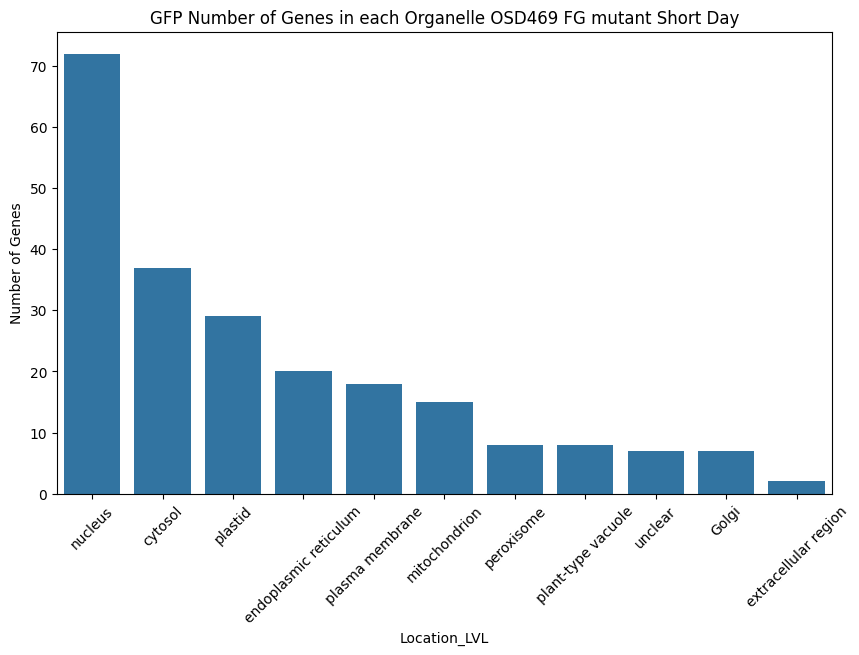

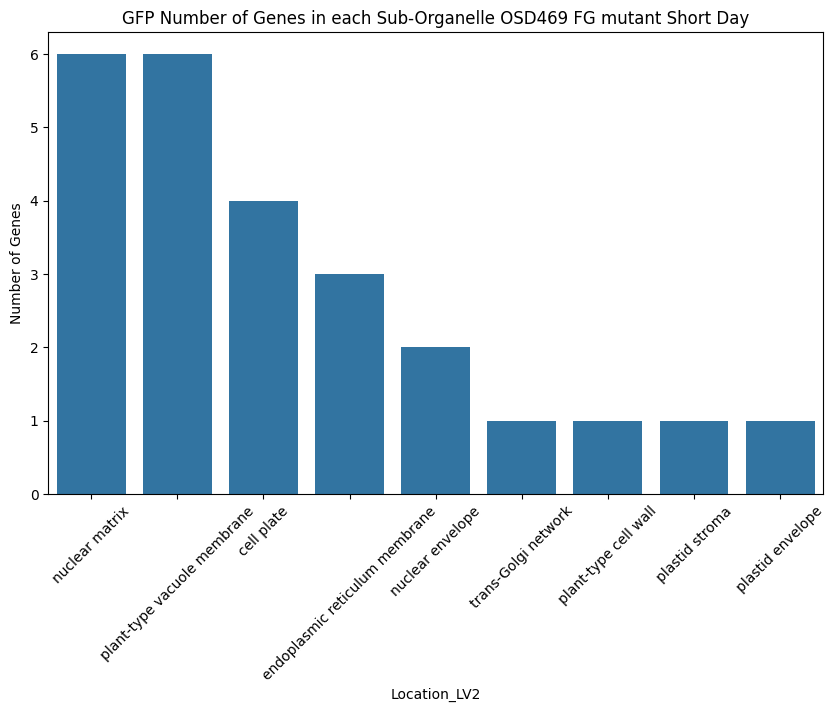

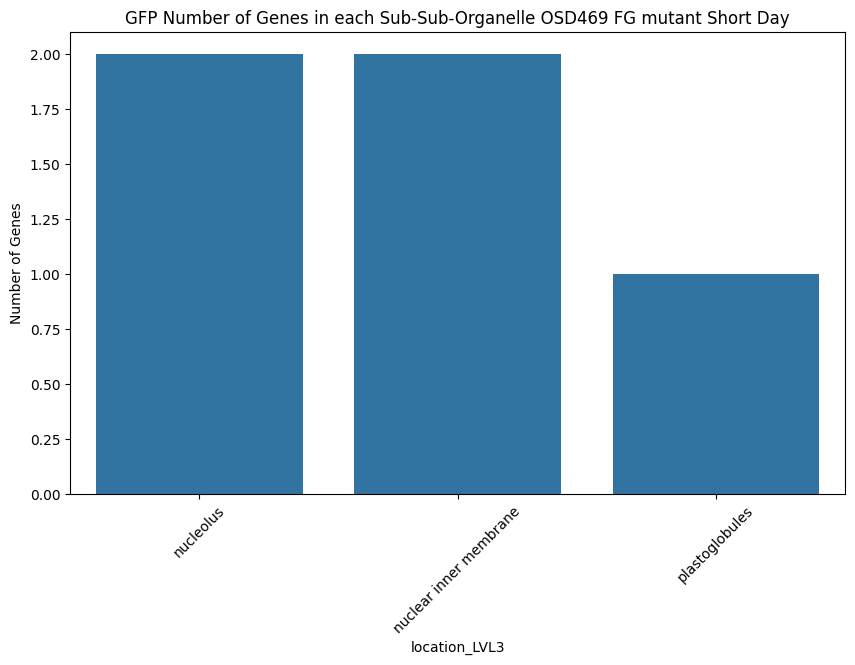

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Location_LVL1' is the column containing the groups in the DataFrame 'apple'

# Count the number of genes in each group
group_counts = apple['Location_LVL1'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.title('GFP Number of Genes in each Organelle OSD469 FG mutant Short Day')
plt.xlabel('Location_LVL')
plt.ylabel('Number of Genes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

group_counts_2 = apple['location_LVL2'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=group_counts_2.index, y=group_counts_2.values)
plt.title('GFP Number of Genes in each Sub-Organelle OSD469 FG mutant Short Day')
plt.xlabel('Location_LV2')
plt.ylabel('Number of Genes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

group_counts_3 = apple['location_LVL3'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=group_counts_3.index, y=group_counts_3.values)
plt.title('GFP Number of Genes in each Sub-Sub-Organelle OSD469 FG mutant Short Day')
plt.xlabel('location_LVL3')
plt.ylabel('Number of Genes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# END OF CODE FOR SUBCELLULAR VIZUALIZATION

In [ ]:
apple.to_csv('Subcellular_gene_localization_across_OSD427_OSD217_OSD469.csv', index=False)

In [ ]:
#Split the dataset into 8 equal parts
#(IN CASE WE GOTTA DO IT MANUALLY THROUGH SUBA4)

In [ ]:
#Find a way to run the TAIR ID's through SUBA4 (data mining)
#Make a robot do it and create the dataset

In [ ]:
#What life do I want to live?

# Mapping the Datasets from Photorespiration into each experiment(%) + heatmaps

In [ ]:
locals().clear()
globals().clear()

In [ ]:
a = 1

In [ ]:
#All the following is the filtered data (we get the differentially filtered files)
import pandas as pd
paths = ['/content/OSD217_WS_FLT_vs_GC_filtered.csv', '/content/OSD427_WT_FLT_vs_GC_filtered.csv','/content/OSD427_elp_FLT_vs_GC_filtered.csv','/content/OSD427_met_FLT_vs_GC_filtered.csv','/content/OSD469_FG_LD_FLT_vs_GC_filtered.csv','/content/OSD469_FG_SD_FLT_vs_GC_filtered.csv','/content/OSD469_WT_LD_FLT_vs_GC_filtered.csv','/content/OSD469_WT_SD_FLT_vs_GC_filtered.csv']

dfs = [pd.read_csv(path, sep='\t') for path in paths]

# Assigning each DataFrame to separate variables
OSD_217, OSD_427_WT, OSD_427_elp, OSD_427_met, OSD_469_FG_LD, OSD_469_FG_SD, OSD_469_WT_LD, OSD_469_WT_SD = dfs


In [ ]:
import pandas as pd

path = '/content/OSD217_WS_FLT_vs_GC_filtered.csv'
df = pd.read_csv(path, sep=",")
df

KeyError: '_oh'

In [ ]:
#I think the system might have overloaded, not sure :/

In [ ]:
import pandas as pd
df = pd.read_csv('/content/OSD217_WS_FLT_vs_GC_filtered.csv', header=None, sep='\t', skiprows=1)
#df.columns = ['TAIR', 'log2FoldChange', 'pvalue']
df.head()

KeyError: 'In'

KeyError: '_oh'